# Central Limit Theorem

The Central Limit Theorem states that, under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases.\

It becomes very useful for applying statistical logic to sample statistics in order to estimate population parameters.
- The average of samples will form a normal distribution, we can use this information to estimate the probability of samples taking on extreme values that deviate from the population mean.
#### Example
- E.g Let's say the we know the mean and standard deviation of asthma rates in th US. If we take a sample froma specific city and find thet the meanis lower than the overall population. 
- We may then be interested in questions such as "What is the probability that this was just caused by random sampling?"
- We have reason to believe that the city has higher rates of asthma and that its population is statistically different than that of the general population.
#### Computation
1. We know the mean population and by the central limit theorem, the average of various samples takes on a normal distribution.
2. From that normal distibution, we can compare the mean of our actual sample and compare it to the distribution of means.
3. It should be rare that our sample mean falls outside 2 or 3 standard deviation from the mean of sample means.
4. Having a sample mean that falls outside of these scopes is worthy of further investigation.

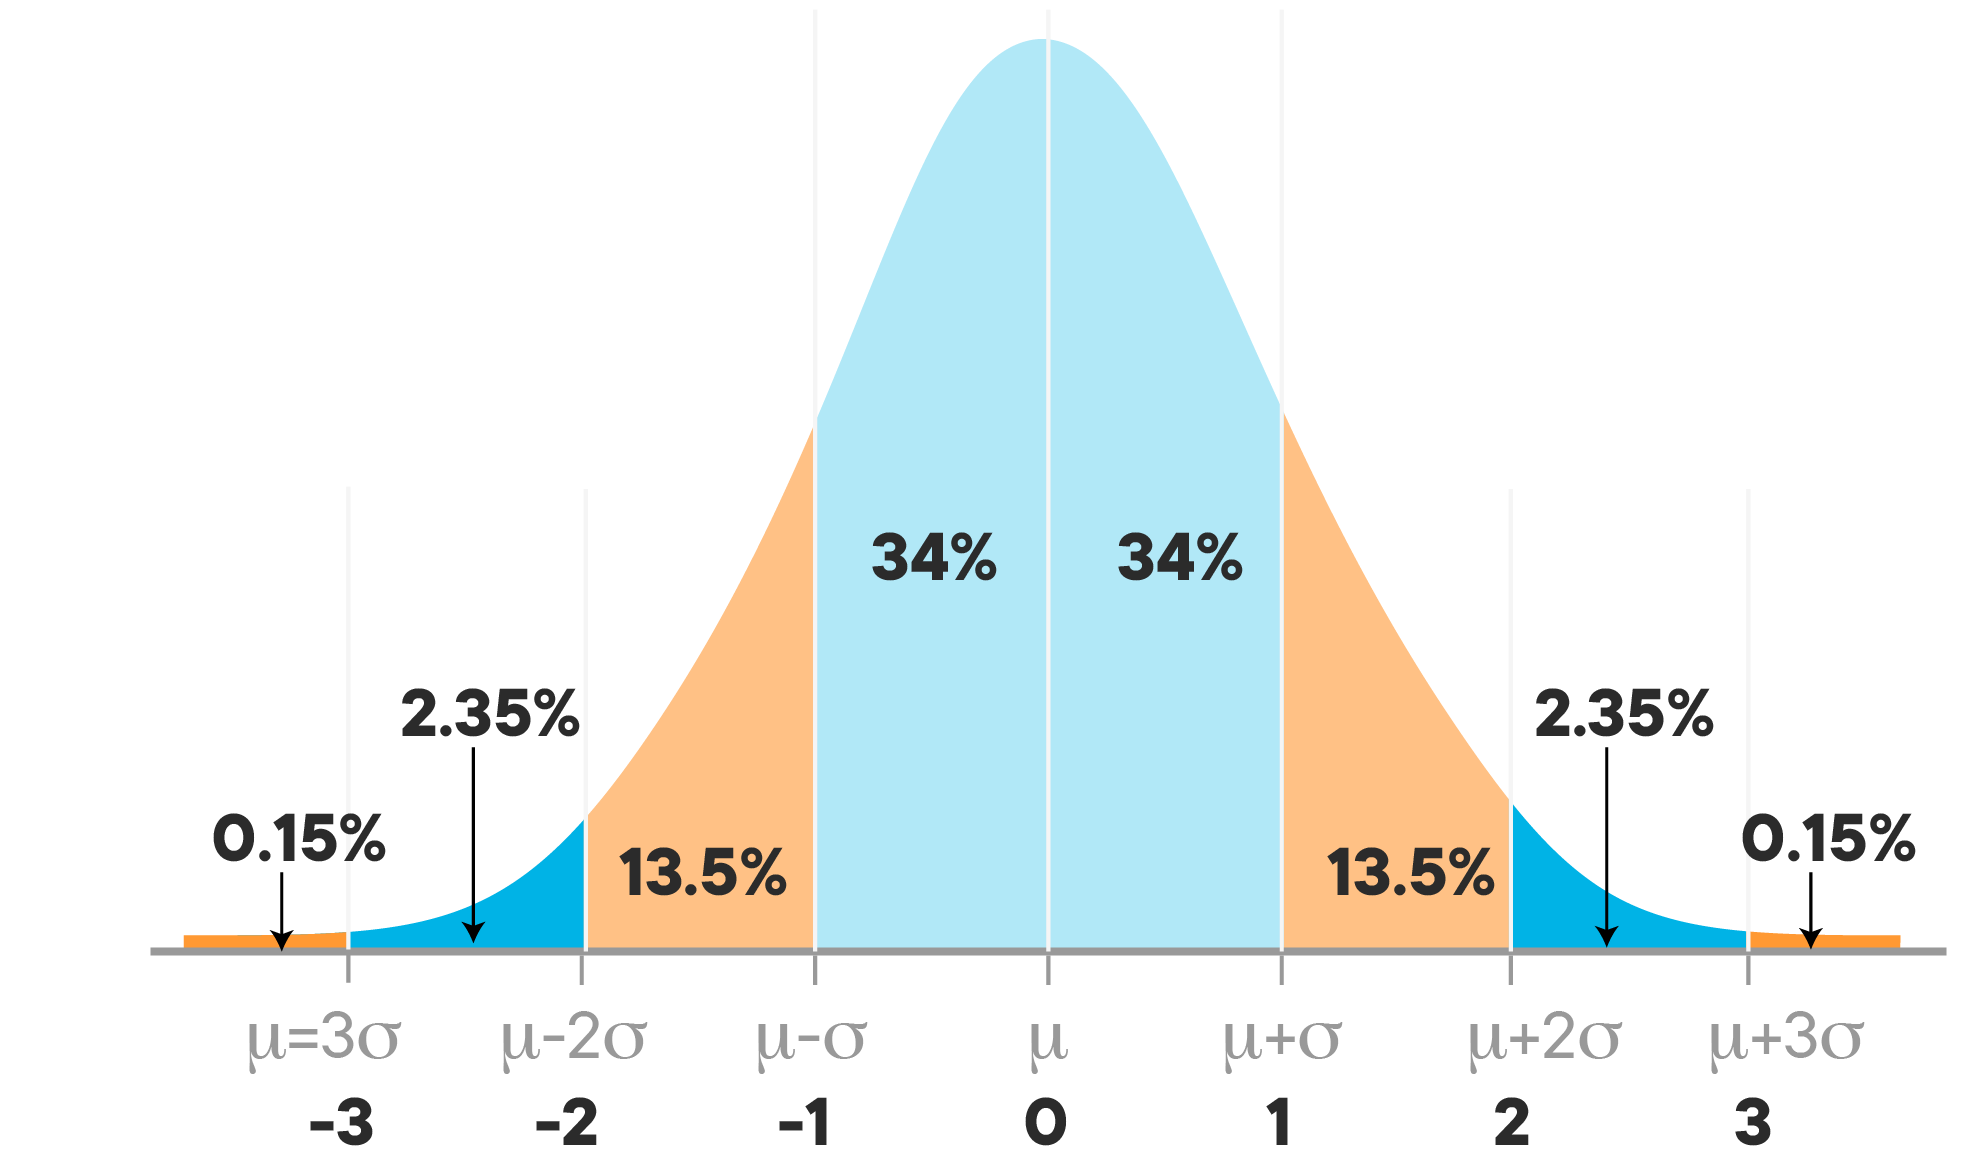

# LABS

# Central Limit Theorem - Lab

## Introduction

In this lab, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives

You will be able to:

* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

## Let's get started!

First, import the required libraries:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

Next, read in the dataset.  A dataset of 10,000 numbers is stored in `non_normal_dataset.csv`. Use pandas to read the data into a series.

**_Hint:_** Any of the `read_` methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter `squeeze=True`.

In [23]:
# Your code here
data = pd.read_csv('non_normal_dataset.csv', squeeze=True)
print(len(data)) # 10000

10000


## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sample distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


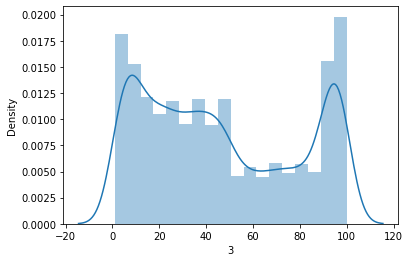

In [24]:
# Your code here
sns.distplot(data);

As expected, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [25]:
# Your code here
st.normaltest(data)

NormaltestResult(statistic=43432.811126532004, pvalue=0.0)

The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sample Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`.

In [26]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

test_sample = get_sample(data, 30)
print(test_sample[:5]) 
# [56, 12, 73, 24, 8] (This will change if you run it multiple times)

[56, 12, 73, 24, 8]


## Generating a Sample Mean

Next, we'll write another helper function that takes in a sample and returns the mean of that sample.  

In [27]:
def get_sample_mean(sample):
    return sum(sample) / len(sample)

test_sample2 = get_sample(data, 30)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean) 
# 45.3 (This will also change if you run it multiple times)

45.3


### Creating a Sample Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sample distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sample distribution of sample means of the given size.  

In [28]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

test_sample_dist = create_sample_distribution(data)
print(test_sample_dist[:5]) 

[48.86666666666667, 39.43333333333333, 49.7, 54.53333333333333, 60.666666666666664]


## Visualizing the Sample Distribution as it Becomes Normal

The sample distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sample distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sample distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sample distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sample distribution with `distplot`.

/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


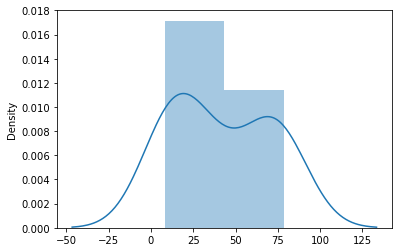

In [29]:
# Your code here
# Visualize sampling distribution with n=3, 10, 30, across across mutliple iterations
sample_dist_10 = create_sample_distribution(data, 10, 3)
sns.distplot(sample_dist_10);

Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.  

/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


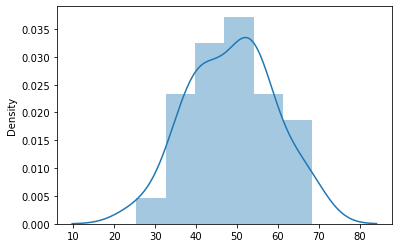

In [30]:
# Your code here
sample_dist_30 = create_sample_distribution(data, 30, 10)
sns.distplot(sample_dist_30);

The data is already looking much more 'normal' than the first sample distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

In the cell below, create another sample distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

/home/henry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


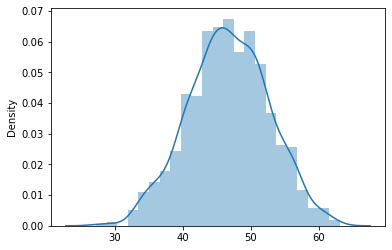

In [31]:
# Your code here
sample_dist_1000 = create_sample_distribution(data, 1000, 30)
sns.distplot(sample_dist_1000);

Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sample distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

In this lab, we learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  

# Sampling Statistics - Lab

## Introduction

Typically, we don't know statistics about a population itself. The only way to know these for sure is to survey the entirety of the population, which is typically impractical. For example, to know the true salary mean of individuals in the United States, we would have to survey each and every individual.

In lieu of being able to know the true underlying population statistics, we estimate them. Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. 

The average of a sample is known as the sample mean. Sampling distribution can be thought of as relative frequency distribution with a large number of samples. A relative frequency distribution tends to approach the sampling distribution as the number of samples increase.

## Objectives
You will be able to:

* Calculate and interpret sampling error
* Explain how sample size is related to sampling error
* Explain how the sampling error is related to population standard deviation

## Background and Terminologies 

In order to learn the **population mean**, we don't measure the whole population. Instead, we take a random sample and use **sample mean, ( x_bar or $\bar{x}$ )** to estimate the population mean **( mu or $\mu$ )**. The sample mean is usually not exactly the same as the population mean and depends upon the values of samples chosen, however, the population mean remains fixed. While using the **sample mean** to estimate the population mean, we come across the **sampling error**, which directly relates to the **standard deviation** of a sampling statistic (e.g. mean values). This difference can be caused by many factors including poor survey design, biased sampling methods, and the randomness inherent to drawing a sample from a population.

Let's learn about these concepts through an example.

>**Pumpkin Weights**

>The population is the weight of six pumpkins (in pounds) displayed in a carnival "Guess the Weight" game booth. You are asked to guess the average weight of the six pumpkins by picking two pumpkins at a time randomly until all pumpkins have been used.

| Pumpkin | Weight (in pounds) |
|---------|--------------------|
| A       |       19           |
| B       |       14           |
| C       |       15           |
| D       |       9            |
| E       |       10           |
| F       |       17           |

## Step 1

Let's calculate the population mean first, which we calculate as:

**$\large \mu = \frac{\text{sum of all elements}}{N}$**, where N is population size.

In [32]:
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

Create two lists, one with pumpkin names and one with the respective pumpkin weights. Combine the lists to create a pumpkin directory with the pumpkin names as keys and the pumpkin weights as values. 

In [33]:
# Create two lists with pumpkin names and weights

# Create two lists with pumpkin names and weights

pumpkin = ['A', 'B', 'C', 'D', 'E', 'F']
weights = [19, 14, 15, 9, 10, 17]

# Combine both lists to create a dictionary

pumpkin_dict = {}
for i in range(len(pumpkin)):
    pumpkin_dict[pumpkin[i]] = weights[i]

print (pumpkin_dict)

#{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


Now, let's try to calculate the mean of the pumpkin population and also visualize the weight distribution. 

In [34]:
# Calculate the population mean from pumpkin_dict

def calculate_mu(x):

    # Use the formula for mu given above
    d = float(sum(x.values())) / len(x)     

    return (d)   

mu = calculate_mu(pumpkin_dict)
mu

# 14.0

14.0

That was a pretty a straightforward exercise. Let's use the data we have so far to visualize the weights of individual pumpkins and mean weight. 

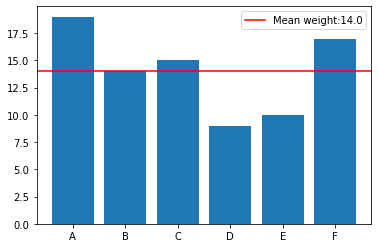

In [35]:
# Plot a bar graph showing weights of pumpkins and highlight the mean weight

plt.bar(range(len(pumpkin_dict)), pumpkin_dict.values(), align='center')
plt.xticks(range(len(pumpkin_dict)), list(pumpkin_dict.keys()))
plt.axhline(y=mu, color='r', linestyle='-', 
            label = "Mean weight:" + str(mu))
plt.legend()
plt.show()

We can see only one pumpkin has a weight which is equal to the mean weight (B:14). Let's try to simulate the random sampling process as stated below. 

## Step 2 : Calculate the mean of samples

From the `pumpkin_dict`, we can now obtain the sampling distributions of the sample mean for a given sample size. We'll do this while sampling *without* replacement (to reflect the idea that one can have two pumpkins at a given time, and will be taken out of population once used). 

Let's also try to make the code more flexible to allow sampling of any number of pumpkins from the population to study the effect of the sample size on the sample mean. 

To achieve this, first, we need to identify all the possible combinations that can be observed by choosing 2 pumpkins from the population, following the game rule.

In [36]:
# Identify a sample size n 
n = 2 

# Use itertools.combinations() to generate a list of combinations
combs = list(itertools.combinations(pumpkin_dict, n))

print ("Using", n, "samples, we can see", len(combs), "possible combinations as below:")
print (combs)

# Using 2 samples, we can see 15 possible combinations as below:
# [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), 
#  ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), 
#  ('E', 'F')]

Using 2 samples, we can see 15 possible combinations as below:
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


Great! We can now generate any number of combinations from the population (try changing the value of `n` above). The next step in the process is to calculate the mean of all possible combinations and study whether these means differ from the population mean, and whether sample size has any effect on estimating the population mean. 

Let's write a function that would include the code for generating combinations as above and also for identifying the mean for each sample. 

In [37]:

def sample_means(sample_size, data):

    """
    This function takes in population data as a dictionary along with a chosen sample size 
    to generate all possible combinations of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations ( as tuples ) 
    b) a list of means for all sample
    """

    n = sample_size

    # Calculate the mean of population
    mu = calculate_mu(data)
    #print ("Mean of population is:", mu)

    # Generate all possible combinations using given sample size

    combs = list(itertools.combinations(data, n))
    print ("Using", n, "samples with a population of size, we can see", len(combs), "possible combinations ")
    
    # Calculate the mean weight (x_bar) for all the combinations (samples) using the given data
    x_bar_list = []

    # Calculate sample mean for all combinations
    for i in range(len(combs)):
        sum = 0

        for j in range(n):
            key = combs[i][j]
            val =data[str(combs[i][j])]
            sum += val

        x_bar = sum/n
        x_bar_list.append(x_bar)
    print ("The mean of all sample means mu_x_hat is:", np.mean(x_bar_list))

    return combs, x_bar_list

n = 2 #Sample size

combs, means = sample_means(n, pumpkin_dict)

# Print the sample combinations with their means
for c in range(len(combs)):
    print (c+1, combs[c], means[c])

# Print the sample combinations with their means



# Using 2 samples, we can see 15 possible combinations as below:
# The mean of all sample means mu_x_hat is: 14.0
# ('A', 'B') 16.5
# ('A', 'C') 17.0
# ('A', 'D') 14.0
# ('A', 'E') 14.5
# ('A', 'F') 18.0
# ('B', 'C') 14.5
# ('B', 'D') 11.5
# ('B', 'E') 12.0
# ('B', 'F') 15.5
# ('C', 'D') 12.0
# ('C', 'E') 12.5
# ('C', 'F') 16.0
# ('D', 'E') 9.5
# ('D', 'F') 13.0
# ('E', 'F') 13.5
# The mean of all sample means mu_x_hat is: 14.0

Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
1 ('A', 'B') 16.5
2 ('A', 'C') 17.0
3 ('A', 'D') 14.0
4 ('A', 'E') 14.5
5 ('A', 'F') 18.0
6 ('B', 'C') 14.5
7 ('B', 'D') 11.5
8 ('B', 'E') 12.0
9 ('B', 'F') 15.5
10 ('C', 'D') 12.0
11 ('C', 'E') 12.5
12 ('C', 'F') 16.0
13 ('D', 'E') 9.5
14 ('D', 'F') 13.0
15 ('E', 'F') 13.5


Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words: 
>If one does the experiment over and over again, the overall average of the sample mean is exactly the population mean.

In the output above, we can see that some mean values i.e. 14.5, 12, are being repeated in the combinations. We can develop a frequency table to identify the probability of seeing a different mean value. 

In [38]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    #Calculate the frequency of each mean value
    freq = Counter(means)

    prob = []
    # Calculate and append fequency of each mean value in the prob list. 
    for element in means:
        for key in freq.keys():
            if element == key:
                prob.append(str(freq[key])+"/"+str(len(means)))
    return prob
    
probs = calculate_probability(means)

# Print combinations with sample means and probability of each mean value
for c in range(len(combs)):
    print (c+1, combs[c], means[c], probs[c])

# ('A', 'B') 16.5 1/15
# ('A', 'C') 17.0 1/15
# ('A', 'D') 14.0 1/15
# ('A', 'E') 14.5 2/15
# ('A', 'F') 18.0 1/15
# ('B', 'C') 14.5 2/15
# ('B', 'D') 11.5 1/15
# ('B', 'E') 12.0 2/15
# ('B', 'F') 15.5 1/15
# ('C', 'D') 12.0 2/15
# ('C', 'E') 12.5 1/15
# ('C', 'F') 16.0 1/15
# ('D', 'E') 9.5 1/15
# ('D', 'F') 13.0 1/15
# ('E', 'F') 13.5 1/15


1 ('A', 'B') 16.5 1/15
2 ('A', 'C') 17.0 1/15
3 ('A', 'D') 14.0 1/15
4 ('A', 'E') 14.5 2/15
5 ('A', 'F') 18.0 1/15
6 ('B', 'C') 14.5 2/15
7 ('B', 'D') 11.5 1/15
8 ('B', 'E') 12.0 2/15
9 ('B', 'F') 15.5 1/15
10 ('C', 'D') 12.0 2/15
11 ('C', 'E') 12.5 1/15
12 ('C', 'F') 16.0 1/15
13 ('D', 'E') 9.5 1/15
14 ('D', 'F') 13.0 1/15
15 ('E', 'F') 13.5 1/15


Here, we see that the chance that the sample mean is exactly the population mean (i.e. 14) is only 1 in 15 (row 3), very small. It may also happen that the sample mean can never be the same value as the population mean. 

The difference between the sample mean and the population mean is known as the **Sampling Error**.  

>When using the sample mean to estimate the population mean, some possible error will be involved since random sample means are also random.

## Sample size and sampling error: 

Sample means cluster more closely around the population mean as the sample size increases. Thus, sampling error decreases as sample size increases.

Let's repeat the above exercise while increasing the sample size from 2 to 5. 

In [39]:
n = 5

# Use above functions to generate combinations as samples with means and calculate the probability of seeing
# each mean value  with sample size = 5.

combs, means = sample_means(n, pumpkin_dict)
probs = calculate_probability(means)
for c in range(len(combs)):
    print (c+1, combs[c], means[c], probs[c])
# Using 5 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0
# 1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
# 2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
# 3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
# 4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
# 5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
# 6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


Again, we see that using the sample mean to estimate the population mean involves sampling error. Sample means do not fully agree with the population mean. The mean of sample means, however, is still 14. 

In order to fully appreciate the impact of sample size on estimating the population mean, let's try to visualize sample means and how the spread of values change when changing sample size. 

In a loop, run the above experiment with sample sizes ranging from 1 to 5 and measure and visualize the spread of values around the population mean. 

Using 1 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 3 samples with a population of size, we can see 20 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 4 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0


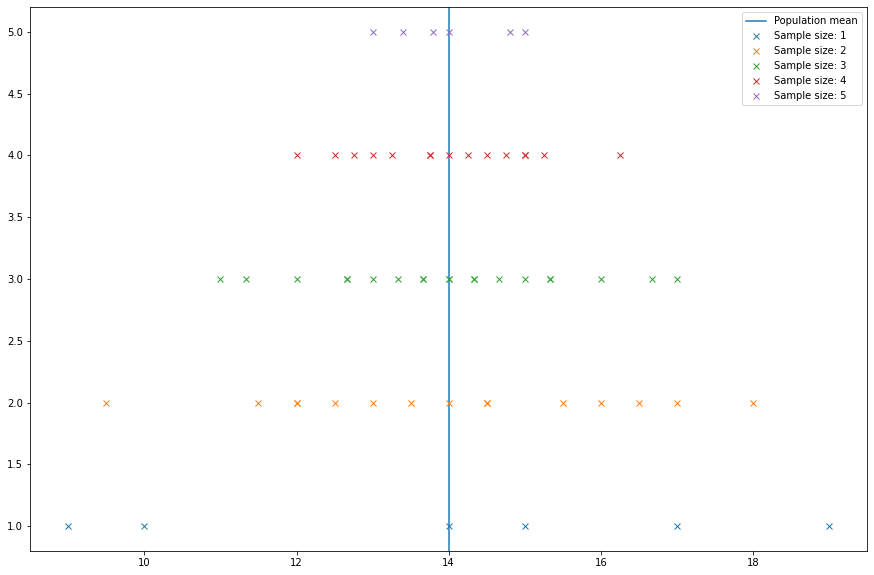

In [40]:
# Run a for loop to execute above code for sample size 1 to 5 and visualise the spread of sample 
# means

plt.figure(figsize=(15,10))

plt.axvline(x=mu, label = "Population mean")

# Run a for loop to execute above code for sample size 1 to 5 and visualise the spread of sample 
# means
for n in (1,2,3,4,5):
    combs, means = sample_means(n, pumpkin_dict)
    probs = calculate_probability(means)
    val = n # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(10) # just as an example array
    plt.plot(means, np.zeros_like(means) + val, 'x', label =("Sample size: "+ str(n)))
    plt.legend()


plt.show()

# Using 1 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 2 samples with a population of size, we can see 15 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 3 samples with a population of size, we can see 20 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 4 samples with a population of size, we can see 15 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 5 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

We can see that with increasing sample size, the **spread** of sample means is reduced and the sample mean values tend to come closer to the population mean.

## Step 3: Calculate the standard error

### So what is standard error?

The **_Standard Error (SE)_** is very similar to the standard deviation. Both are measures of spread. The higher the number, the more spread out your data is. To put it simply, the two terms are essentially equal — but there is one important difference. While the standard error uses statistics (sample data), standard deviations use parameters (population data). We achieve this by dividing the standard deviation by the square root of the sample size.

The calculation for the standard error of the sample mean is:

## $$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$$

Here, $\sigma$ is the population standard deviation (which we will approximate with the sample standard deviation $s$) and $n$ is the sample size.

Let's run the above block of code again and calculate the standard error according to the chosen sample size

Using 1 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 2 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 3 samples with a population of size, we can see 20 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 4 samples with a population of size, we can see 15 possible combinations 
The mean of all sample means mu_x_hat is: 14.0
Using 5 samples with a population of size, we can see 6 possible combinations 
The mean of all sample means mu_x_hat is: 14.0


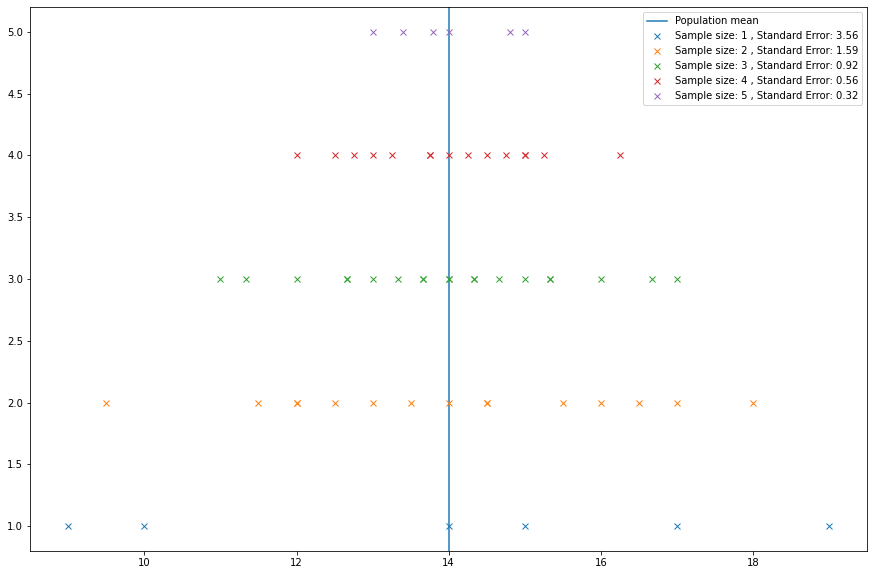

In [41]:
plt.figure(figsize=(15,10))
plt.axvline(x=mu, label = "Population mean")

# Create empty lists for storing sample means, combinations and standard error for each iteration
means_list = []
combs_list = []
err_list = []
for n in (1, 2,3,4,5):
    # Calculate combinations, means and probabilities as earlier
    
    combs, means = sample_means(n, pumpkin_dict)

    combs_list.append(combs)
    means_list.append(means)

    # Calculate the standard error by dividing sample means with square root of sample size
    err = round(np.std(means)/np.sqrt(n), 2)
    err_list.append(err)

    val = n # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(10) # just as an example array
    plt.plot(means, np.zeros_like(means) + val, 'x', label ="Sample size: "+ str(n) + " , Standard Error: "+ str(err) )
    plt.legend()
plt.show()

Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words, if one does the experiment over and over again, the overall average of the sample mean is exactly the population mean. If the sample size is increased, the standard error is reduced. 

According to the **Central Limit Theorem**, for a large sample size, `x_hat` is approximately normally distributed, regardless of the distribution of the population one samples from.

## Summary

In this lab, we saw how sampling statistics relate to population statistics. In order to estimate a population parameter (i.e. mean) with a high level of accuracy, We must reduce the spread or the sample error which is simply the standard deviation of the samples from the sample mean. The size of samples must be set carefully in order to avoid excessive values for standard error to gain a high level of confidence in our population estimates. 

# Confidence Intervals - Lab

## Introduction

As we begin to talk about confidence intervals, it’s important to remember the difference between a **sample distribution** and a **sampling distribution**. 

Remember that a sample data distribution is the distribution of the data points within a single sample.  A sampling distribution is the probability distribution a statistic can take. Also recall that, by the Central Limit Theorem, the sampling distribution of the sample mean (x_hat) is approximately normal regardless of the shape of the original distribution of the variable.

As seen in a previous lab,  point estimates can provide some idea of a population parameter like the mean, but estimates are prone to error and also, taking multiple samples to get improved estimates may not be feasible all the time. 

## Objectives

You will be able to:

* Calculate confidence intervals
* Interpret confidence intervals in relation to true population parameters

## Data 

If we wanted to know the average age of registered voters in some elections, we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole.

In a previous lab, we saw that the sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's run a simulation to investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [42]:
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period. We shall use a Poisson distribution to construct a bimodal distribution.

In [43]:
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

Calculate the mean for the population and visualize the distribution. Also, describe the solution using five point statistics. (Hint: convert the population_ages array into a dataframe).

In [44]:

# Convert the population into a pandas dataframe pop_ages
pop_ages = pd.DataFrame(population_ages, columns=['Age'])

# Calculate and print descriptive statistics for pop_ages

print (pop_ages.describe())

# The mean of population is: 42.985332

# count	250000 
# mean	42.985332
# std	13.211628
# min	18.000000
# 25%	29.000000
# 50%	47.000000
# 75%	54.000000
# max	84.000000


                 Age
count  250000.000000
mean       42.985332
std        13.211628
min        18.000000
25%        29.000000
50%        47.000000
75%        54.000000
max        84.000000


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

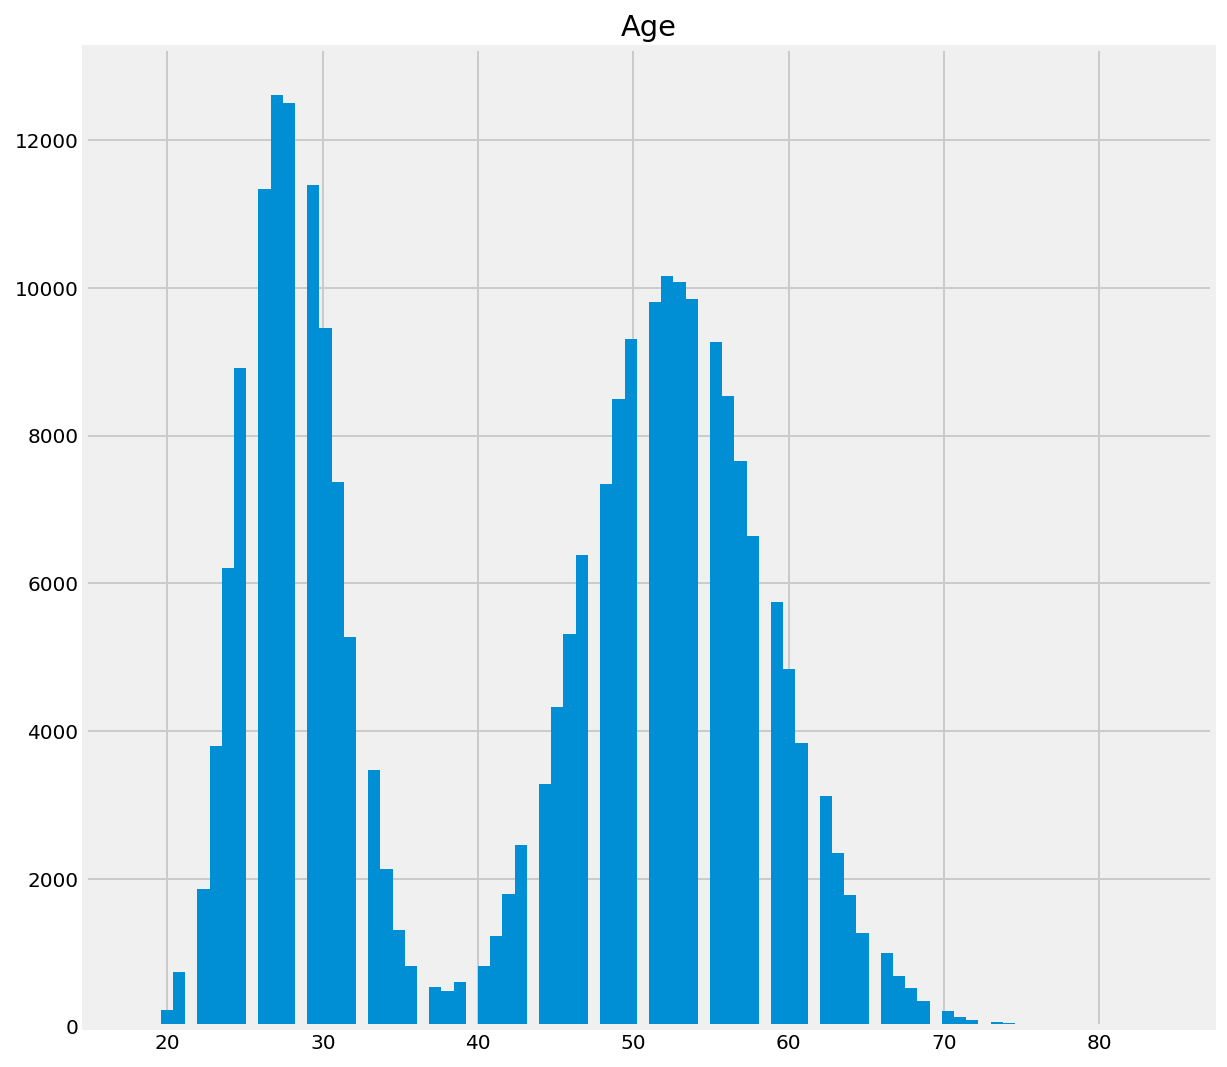

In [45]:
# Draw a histogram for pop ages
pd.DataFrame(pop_ages).hist(bins='auto',figsize=(9,9))


Let's take a random sample of size 500 from this distribution and calculate the sample mean and standard deviation. Also, work out the difference between the population and sample mean. 

In [46]:
np.random.seed(15)

# Take random sample of size 500
sample_size = 500
sample = np.random.choice(a= population_ages,
                               size=500)

# Calculate sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

print ("Sample mean:", sample_mean)
print ("Sample std.:", sample_std)

print ("Difference between means:", population_ages.mean() - sample_mean)

# Sample mean: 43.49 Sample std.: 12.98529552994463
# Difference between means: -0.5046680000000023

Sample mean: 43.49
Sample std.: 12.98529552994463
Difference between means: -0.5046680000000023


We can see there is a small difference between sample mean and population mean. An increase in sample size can help reduce this difference. 

The central limit theorem states the distribution of **many sample means**, known as a **sampling distribution**, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed as we saw above. 

As a result, we can treat the sample mean as if it were drawn from a normal distribution. 

To illustrate, let's create a sampling distribution by taking 100 samples from our population and then making 100 point estimates of the mean. Calculate the mean and standard deviation of sample means.


In [47]:
np.random.seed(15)

point_estimates = []         # Make empty list to hold point estimates

# Take 100 samples and generate 100 point estimates using a for loop. 
# append sample means to get point estimates

for x in range(100):
    sample = np.random.choice(a= population_ages, size=500) #Take 100 samples of 500 people
    point_estimates.append(sample.mean()) #Calculate the sample mean


# Convert the point_estimates into a pandas dataframe
# Calculate and print descriptive statistics for the dataframe

pd.DataFrame(point_estimates).describe()

# count	100.000000
# mean	42.959380
# std	0.586404
# min	41.296000
# 25%	42.530000
# 50%	42.960000
# 75%	43.356000
# max	44.492000

,0
count,100.000000
mean,42.959380
std,0.586404
min,41.296000
25%,42.530000
50%,42.960000
75%,43.356000
max,44.492000


Let's visualize the distribution of sample means to check for normality.

<AxesSubplot:ylabel='Density'>

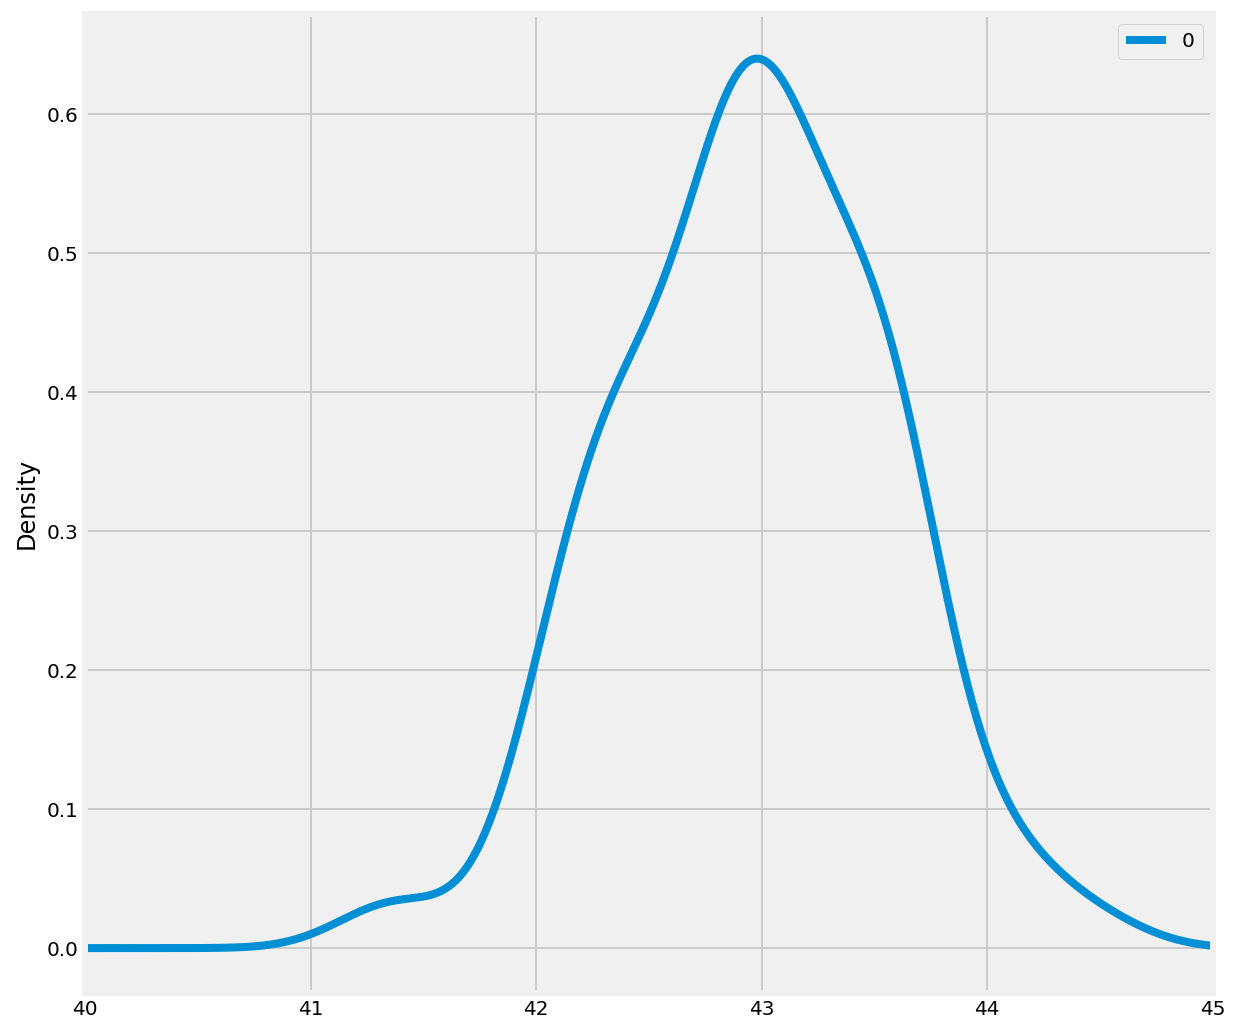

In [48]:
#Visualize the point estimates by plotting a density plot (use pandas)
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(40,45))   

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. This is where the central limit theorem comes into play. In addition, the mean of the sampling distribution approaches the true population mean. The more samples we take, the better our estimate of the population parameter is likely to be. 

## What is a Confidence Interval?

A **Confidence Interval** is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we **want** to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we would set the confidence level to 95%. *Higher confidence levels result in wider confidence intervals.*

We calculate a confidence interval by taking a point estimate and then adding and subtracting a **margin of error** to create a range. The margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

The margin of error for a known population standard deviation is:

> **Margin of Error = z ∗ σ / √n**

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. 

>The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. 

For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval as shown in this image:
![](normal_distribution.png)

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z \text{~} N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z \text{~} N(0, 1)$ normal distribution lies between -1.96 and 1.96.
- **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z \text{~} N(0, 1)$ normal distribution lies between -2.575 and 2.575.

It is more suitable to get z-critical values with `stats.norm.ppf()` as the results are more accurate.
> **`stats.norm.ppf(q, loc=0, scale=1)`**	is a percent point function (inverse of cdf — percentiles).

Create a function to input population and sample data to calculate the confidence intervals:

In [49]:
def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z = stats.norm.ppf(q = 0.975)  #  z-critical value for 95% confidence

    #Calculate the population std from data
    pop_stdev = pop.std()

    # Calculate the margin of error using formula given above
    moe = z * (pop_stdev/math.sqrt(sample_size))

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (x_hat - moe, x_hat + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
    

print("Z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

# z-critical value:
# 1.959963984540054

# Margin of error
# 1.158026699800684

# Confidence interval:
# (41.86997330019931, 44.186026699800685)

Z-critical value:
1.959963984540054

Margin of error
1.158026699800684

Confidence interval:
(41.86997330019931, 44.186026699800685)


> Note that with calculated confidence intervals, we captured the true population mean of 42.9

We can create several such confidence intervals and visualize them to get a better sense of what it means to "capture" the true mean. 

Let's set a sample size of 1000 and take 25 samples to calculate the confidence intervals using the function above. 

In [50]:
np.random.seed(12)

# Select the sample size 
sample_size = 1000

# Initialize lists to store interval and mean values
intervals = []
sample_means = []

# Run a for loop for sampling 25 times and calculate + store confidence interval and sample mean values

for sample in range(25):
    # Take a random sample of chosen size 
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*        
    
    # Calculate z_critical, margin_of_error, confidence_interval from function above
    # z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
    # Calculate and append sample means and conf intervals for each iteration


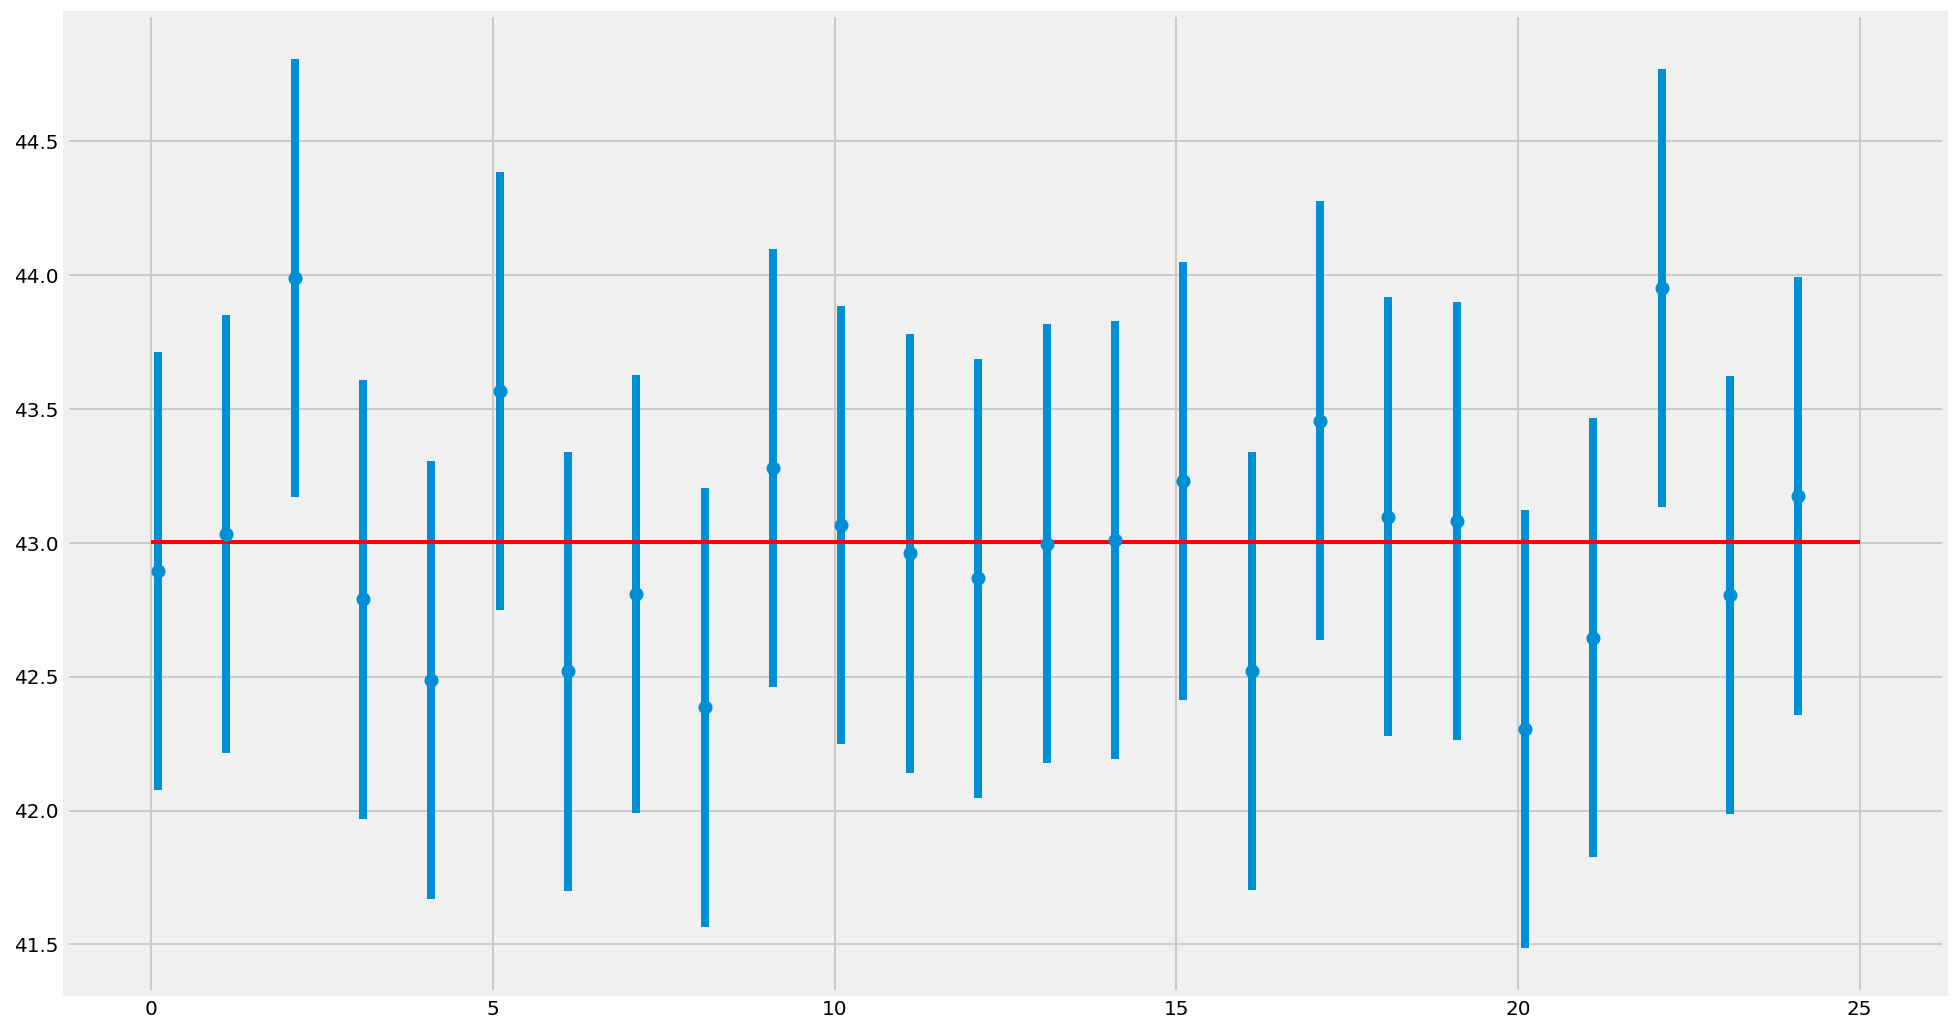

In [51]:

# plot the mean and confidence interval for each sample as error bars
# plot the population mean 

plt.figure(figsize=(15,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

Notice that in the plot above, most of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

## Interpreting the Confidence Interval

There are two interpretations we can derive from the above simulation, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the mean voter age is between 41.6 and 43.9.

**Interpretation 2 (correct):**
 >If we pulled 100 samples and constructed confidence intervals in the same manner, we would expect that 95 of the intervals would contain the true mean of population age. 

Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

## Summary

In this lab, we saw an introduction to confidence intervals and how to construct them from random samples. We also saw how due to the central limit theorem, the mean of sample means tends to be a normal distribution even if the population is bimodal. We also saw how the z-critical value can be used to define the confidence interval based on a confidence level required and the size of samples. We learned how to correctly interpret a confidence interval. 